In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
df=pd.read_csv('/home/anonymous/test/Delhi_airquality_cleaned.csv')

In [17]:
df.columns = ['Month','Milk in pounds per cow']
df

,Month,Milk in pounds per cow
0,2018-01-01 00:00:00,423.0
1,2018-01-01 01:00:00,414.0
2,2018-01-01 02:00:00,417.0
3,2018-01-01 03:00:00,466.0
4,2018-01-01 04:00:00,470.0
...,...,...
2612,2018-04-19 20:00:00,57.0
2613,2018-04-19 21:00:00,57.0
2614,2018-04-19 22:00:00,75.0
2615,2018-04-19 23:00:00,89.0


In [4]:
df['Month'] = pd.to_datetime(df['Month'])
df.head()

,Month,Milk in pounds per cow
0,2018-01-01 00:00:00,423.0
1,2018-01-01 01:00:00,414.0
2,2018-01-01 02:00:00,417.0
3,2018-01-01 03:00:00,466.0
4,2018-01-01 04:00:00,470.0


In [5]:
df.set_index('Month',inplace=True)
df.head()

,Milk in pounds per cow
Month,
2018-01-01 00:00:00,423.0
2018-01-01 01:00:00,414.0
2018-01-01 02:00:00,417.0
2018-01-01 03:00:00,466.0
2018-01-01 04:00:00,470.0


<AxesSubplot:xlabel='Month'>

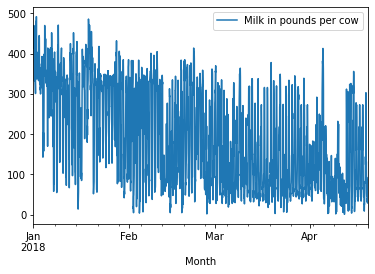

In [6]:
df.plot()

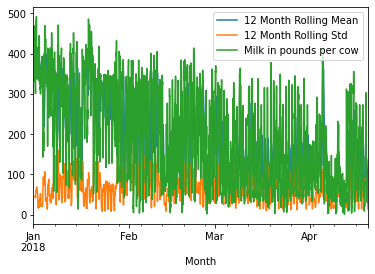

In [7]:
timeseries = df ['Milk in pounds per cow']
timeseries.rolling(12).mean().plot(label='12 Month Rolling Mean')
timeseries.rolling(12).std().plot(label='12 Month Rolling Std')
timeseries.plot()
plt.legend()

<ipython-input-8-78b4ad70229b>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)


<Figure size 432x288 with 0 Axes>

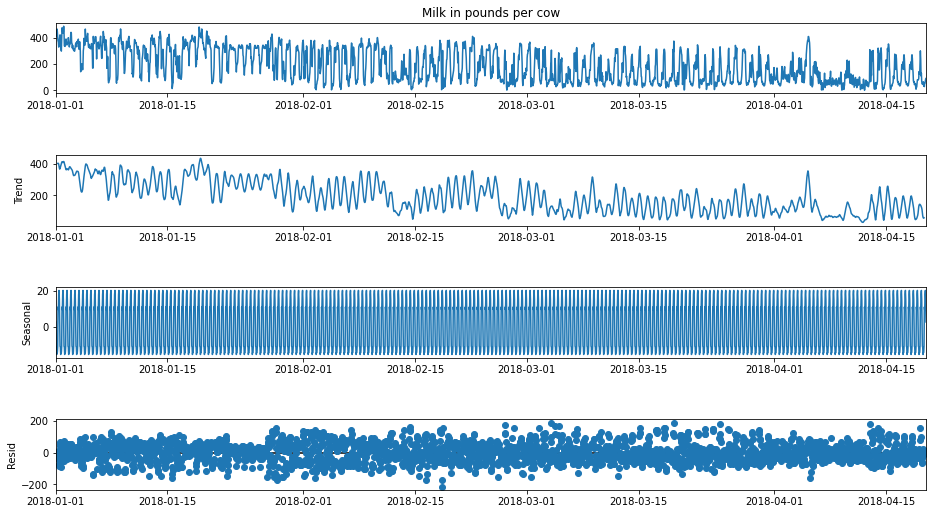

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition = seasonal_decompose(df['Milk in pounds per cow'], freq=12)  
figure = plt.figure()  
figure = decomposition.plot()  
figure.set_size_inches(15, 8)

In [9]:
from statsmodels.tsa.stattools import adfuller

def adf_check(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [10]:
adf_check(df['Milk in pounds per cow'])

1. ADF :  -3.329484883925786
2. P-Value :  0.013610855436105575
3. Num Of Lags :  27
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2589
5. Critical Values :
	 1% :  -3.432878310326342
	 5% :  -2.8626570109517075
	 10% :  -2.567364625328271


In [11]:
df ['Milk First Difference'] = df ['Milk in pounds per cow'] - df ['Milk in pounds per cow']. shift (1)
adf_check(df['Milk First Difference'].dropna())

1. ADF :  -15.650472689992661
2. P-Value :  1.5988257960898655e-28
3. Num Of Lags :  26
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 2589
5. Critical Values :
	 1% :  -3.432878310326342
	 5% :  -2.8626570109517075
	 10% :  -2.567364625328271


<AxesSubplot:xlabel='Month'>

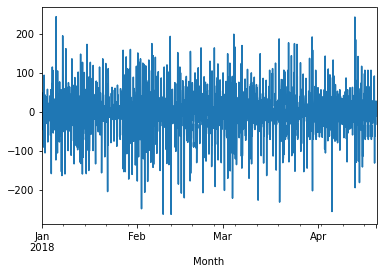

In [12]:
df ['Milk First Difference']. plot ()

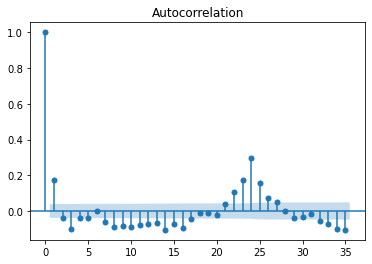

In [13]:
from statsmodels.graphics.tsaplots import plot_acf
fig_first = plot_acf(df["Milk First Difference"].dropna())

In [14]:
df

,Milk in pounds per cow,Milk First Difference
Month,,
2018-01-01 00:00:00,423.0,NaN
2018-01-01 01:00:00,414.0,-9.0
2018-01-01 02:00:00,417.0,3.0
2018-01-01 03:00:00,466.0,49.0
2018-01-01 04:00:00,470.0,4.0
...,...,...
2018-04-19 20:00:00,57.0,28.0
2018-04-19 21:00:00,57.0,0.0
2018-04-19 22:00:00,75.0,18.0
